In [2]:
import cv2
import random
import numpy as np

In [3]:
import matplotlib.pyplot as plt 

### 显示图片

In [4]:
img_gray = cv2.imread('img.jpg',0)
img = cv2.imread('img.jpg')

In [15]:
cv2.imshow('pic',img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_gray)

[[ 62  67  73 ... 164 162 159]
 [ 65  70  76 ... 160 159 157]
 [ 70  74  80 ... 156 154 152]
 ...
 [ 14  17  49 ... 119  83  78]
 [ 18  34  49 ... 109  93  47]
 [ 31  44  52 ... 134 128  91]]


In [8]:
print(img_gray.dtype)

uint8


In [9]:
img_gray.shape

(90, 135)

### crop 图片

In [18]:
img_crop = img[0:50,0:100]
cv2.imshow('crop_pic',img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_crop)

[[[105  65  40]
  [110  70  45]
  [116  76  51]
  ...
  [156 124 101]
  [157 124 104]
  [157 124 104]]

 [[108  68  43]
  [113  73  48]
  [119  79  54]
  ...
  [157 125 102]
  [157 124 104]
  [157 124 104]]

 [[113  73  48]
  [117  77  52]
  [123  83  58]
  ...
  [159 124 104]
  [158 125 106]
  [158 125 106]]

 ...

 [[ 43  10  47]
  [ 73  39  79]
  [ 97  63 104]
  ...
  [ 94 164 224]
  [ 91 161 220]
  [ 84 154 208]]

 [[ 57  24  59]
  [ 76  41  81]
  [ 77  39  87]
  ...
  [103 161 220]
  [107 166 222]
  [108 168 220]]

 [[ 55  13  60]
  [ 91  50 101]
  [ 75  31  92]
  ...
  [ 84 138 198]
  [128 183 240]
  [117 175 227]]]


### 图片分割三通道

In [30]:
B,G,R = cv2.split(img)
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(B.shape)
print(G.shape)
print(R.shape)
print(R.dtype)
print(B.dtype)

(90, 135)
(90, 135)
(90, 135)
uint8
uint8


### 改变颜色通道

In [25]:
def random_light_color(img):
    B,G,R = cv2.split(img)
    b_rand = random.randint(-50,50)
    if b_rand == 0:
        pass
    elif b_rand > 0 :
        lim = 255-b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0-b_rand
        B[B<lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
    g_rand = random.randint(-50,50)
    if g_rand == 0:
        pass
    elif g_rand > 0 :
        lim = 255-g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0-g_rand
        G[G<lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
    r_rand = random.randint(-50,50)
    if r_rand == 0:
        pass
    elif r_rand > 0 :
        lim = 255-r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0-r_rand
        R[R<lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    img_merge = cv2.merge((B, G, R))
    return img_merge

In [26]:
img_random_color = random_light_color(img)

In [27]:
cv2.imshow('lightpic',img_random_color)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### 矩阵的运算

对每个数满足直接操作

In [46]:
G = np.array([[1,2,3],[2,3,4],[5,5,6]])

In [47]:
g_rand = random.randint(0,5)
print(g_rand)
if g_rand == 0:
    pass
elif g_rand > 0 :
    lim = 10-g_rand
    G[G > lim] = 10
    G[G <= lim] = (g_rand + G[G <= lim])
elif g_rand < 0:
    lim = 0-g_rand
    G[G<lim] = 0
    G[G >= lim] = (g_rand + G[G >= lim])


4


In [48]:
print(G)

[[ 5  6  7]
 [ 6  7  8]
 [ 9  9 10]]


### gamma 变换

    在图像处理中，将漂白(相机过曝)的图片或者过暗(曝光不足)的图片，进行修正
    小于1的值让暗部细节大量提升，同时亮部细节少量提升

In [4]:
img_dark = cv2.imread('dark.jpg')
cv2.imshow('img_dark',img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [56]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)** invGamma)* 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark,table)

In [57]:
img_brighter = adjust_gamma(img_dark,2)
cv2.imshow('img_dark',img_dark)
cv2.imshow('img_brighter',img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [27]:
# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x/255.0, gamma)*255.0 for x in range(256)]
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)
    
    # 实现这个映射用的是OpenCV的查表函数
    return cv2.LUT(img, gamma_table)

# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升
img_dark2 = cv2.resize(img_dark,( (img_dark.shape[0]*2),(img_dark.shape[1]*2)))
img_1 = gamma_trans(img_dark2, 0.5)
img_2 = gamma_trans(img_dark2,  1)
img_3 = gamma_trans(img_dark2,  1.5)
cv2.imshow('gamma',img_dark)
cv2.imshow('gamma_1.jpg', img_1)
cv2.imshow('gamma_2.jpg', img_2)
cv2.imshow('gamma_3.jpg', img_3)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### histogram

(array([3.000e+02, 1.090e+02, 9.500e+01, 9.200e+01, 1.260e+02, 1.130e+02,
        1.370e+02, 1.470e+02, 1.510e+02, 2.030e+02, 2.180e+02, 3.090e+02,
        4.490e+02, 6.700e+02, 4.500e+02, 2.522e+03, 2.470e+03, 7.630e+02,
        2.779e+03, 2.995e+03, 1.390e+03, 1.376e+03, 1.157e+03, 3.022e+03,
        3.233e+03, 8.200e+02, 6.500e+02, 5.710e+02, 5.570e+02, 4.520e+02,
        4.050e+02, 3.810e+02, 3.490e+02, 3.110e+02, 2.790e+02, 2.460e+02,
        2.330e+02, 2.310e+02, 2.340e+02, 2.110e+02, 2.050e+02, 1.750e+02,
        1.760e+02, 1.760e+02, 1.650e+02, 1.820e+02, 1.570e+02, 1.470e+02,
        1.490e+02, 1.520e+02, 1.500e+02, 1.550e+02, 1.610e+02, 1.630e+02,
        1.530e+02, 1.210e+02, 1.190e+02, 1.090e+02, 9.000e+01, 8.400e+01,
        9.000e+01, 9.700e+01, 8.100e+01, 8.400e+01, 7.700e+01, 9.300e+01,
        8.600e+01, 7.500e+01, 8.000e+01, 7.800e+01, 7.000e+01, 8.000e+01,
        7.400e+01, 6.600e+01, 5.200e+01, 6.900e+01, 6.200e+01, 6.500e+01,
        7.300e+01, 5.500e+01, 5.900e+0

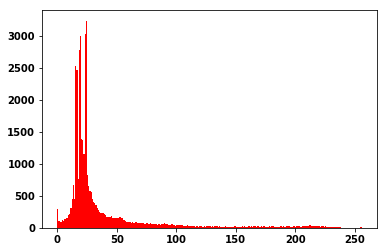

In [7]:
img_small_brighter = cv2.resize(img_dark, (int(img_dark.shape[0]*2), int(img_dark.shape[1]*2)))
plt.hist(img_dark.flatten(),256,[0,256],color='r')

In [8]:
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) #只对灰度图片均衡化
img_out = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR)
cv2.imshow('input image',img_small_brighter)
cv2.imshow('Hist image',img_out)
key = cv2.waitKey(0)
if key == 27:
    exit()

### 旋转

In [10]:
def roate_img(img):  
   # scale+rotation+translation = similarity transform
    M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),30,1) # center, angle, scale
    img_roate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
    cv2.imshow('roate', img_roate)
    key = cv2.waitKey(0)
    if key == 27:
        exit()

In [11]:
roate_img(img)

[[  0.8660254    0.5        -13.45671476]
 [ -0.5          0.8660254   39.77885683]]


In [5]:
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
# 沿着横纵轴放大1.6倍，然后平移(-150,-240)，最后沿原图大小截取，等效于裁剪并放大
M_crop_elephant = np.array([
    [1.6, 0, -150],
    [0, 1.6, -240]
], dtype=np.float32)

img_elephant = cv2.warpAffine(img, M_crop_elephant, (400, 600))
cv2.imwrite('lanka_elephant.jpg', img_elephant)

# x轴的剪切变换，角度15°
theta = 15 * np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)

img_sheared = cv2.warpAffine(img, M_shear, (400, 600))
cv2.imwrite('lanka_safari_sheared.jpg', img_sheared)

# 顺时针旋转，角度15°
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

img_rotated = cv2.warpAffine(img, M_rotate, (400, 600))
cv2.imwrite('lanka_safari_rotated.jpg', img_rotated)

# 某种变换，具体旋转+缩放+旋转组合可以通过SVD分解理解
M = np.array([
    [1, 1.5, -400],
    [0.5, 2, -100]
], dtype=np.float32)

img_transformed = cv2.warpAffine(img, M, (400, 600))
cv2.imwrite('lanka_safari_transformed.jpg', img_transformed)

In [6]:
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

In [7]:
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()